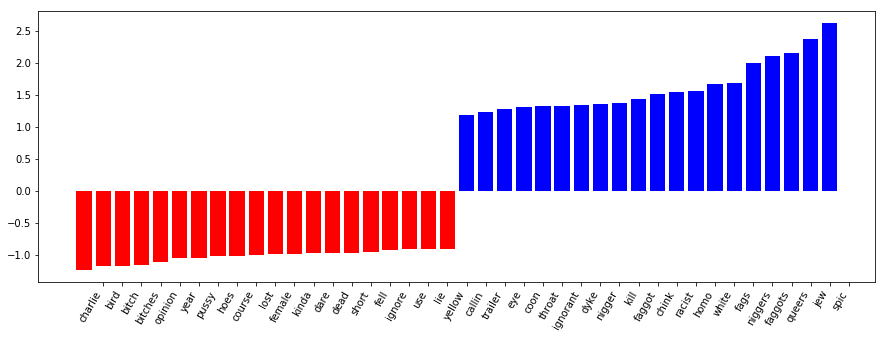

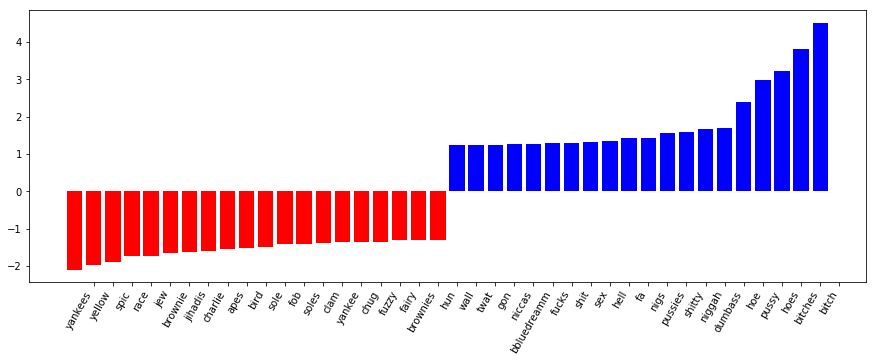

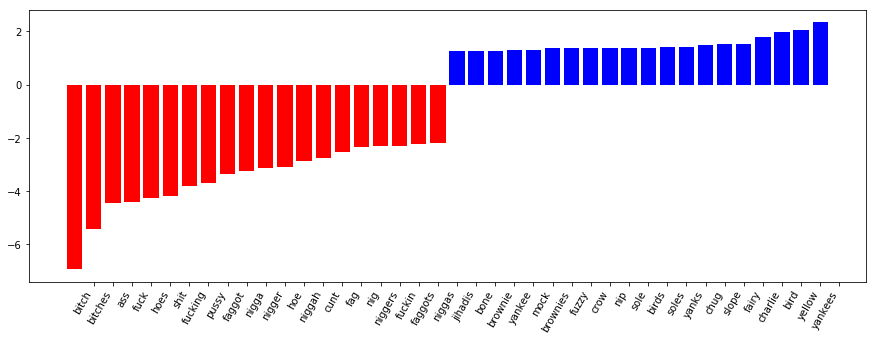

Train error: 0.07263336292470342
Test error: 0.09636026148010653


In [2]:
import random
import collections
import math
import sys
import numpy as np
import csv
import pandas as pd
import string
import html
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

def formatData(pathName):
    trainData = pd.read_csv(pathName)
    col = ['tweet', 'class']
    trainData = trainData[col]
    trainData = trainData[pd.notnull(trainData['tweet'])]
    trainData.columns = ['tweet', 'class']
    id_to_category = dict(trainData[['class', 'tweet']].values)
    trainData.head()
    return trainData

def evaluatePredictor(xData, yData, predictor, asciiX, start, end):
    '''
    predictor: a function that takes an x and returns a predicted y.
    Given a list of examples (x, y), makes predictions based on |predict| and returns the fraction
    of misclassiied examples.
    '''
    #figure out indexes for yTrain vs yTest
    error = 0
    yPred = predictor.predict(xData)
    for i in range(start, end-1):
        if (yPred[i] != yData[i]):
            error += 1
            #print(asciiX[i], yPred[i], yData[i])
    return 1.0 * error / len(yData)

def htmlConvert(data, start, end):
    asciiData = data.copy()
    for i in range(start, end): 
        x = data[i]
        x = html.unescape(x)
        x = re.sub(r"http\S+", "", x)
        asciiData[i] = x
    return asciiData

def plotCoefficients(classifier, feature_names, top_features=20):
    for i in range(len(classifier.coef_)):
        coef = classifier.coef_[i].ravel()
        top_positive_coefficients = np.argsort(coef)[-top_features:]
        top_negative_coefficients = np.argsort(coef)[:top_features]
        top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

        # create plot
        plt.figure(figsize=(15, 5))
        colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
        plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
        feature_names = np.array(feature_names)
        plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
        plt.show()

def main():    
    data = formatData('hatespeechdata.csv')
    halfDataLen = int(len(data)/2)
    trainData = data[0:halfDataLen]
    testData = data[halfDataLen+1:]
    
    xTrain = trainData['tweet']
    yTrain = trainData['class']
    xTest = testData['tweet']
    yTest = testData['class']
    yTest = yTest.reset_index(drop=True)
    
    #Make sure all the html encodings are output as valid text i.e. &amp as "&", takes care of emojis
    asciiX = htmlConvert(xTrain, 0, halfDataLen)
    asciiXTest = htmlConvert(xTest, halfDataLen + 1, len(data))
    features = tfidf.fit_transform(asciiX).toarray()

    vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')
    tfidfconverter = TfidfTransformer()

    #Train data
    xTrainCounts = vectorizer.fit_transform(asciiX)
    xTrainTfidf = tfidfconverter.fit_transform(xTrainCounts)
    classifier = svm.LinearSVC().fit(xTrainTfidf, yTrain)
    plotCoefficients(classifier, vectorizer.get_feature_names())
    
    #Format test data
    xTestCounts = vectorizer.transform(asciiXTest)
    xTestTfidf = tfidfconverter.transform(xTestCounts)
    
    #Train 1 v rest on train data, and run on test data
    trainError = evaluatePredictor(xTrainTfidf, yTrain, classifier, asciiX, 0, halfDataLen)  
    testError = evaluatePredictor(xTestTfidf, yTest, classifier, asciiXTest, 0, halfDataLen)
 
    print("Train error:", trainError)
    print("Test error:", testError)
        
if __name__ == '__main__':
    main()

In [6]:
import random
import collections
import math
import sys
import numpy as np
import csv
import pandas as pd
import string
import html
import re
def formatData(pathName):
    trainData = pd.read_csv(pathName)
    col = ['tweet', 'class']
    trainData = trainData[col]
    trainData = trainData[pd.notnull(trainData['tweet'])]
    trainData.columns = ['tweet', 'class']
    id_to_category = dict(trainData[['class', 'tweet']].values)
    trainData.head()
    return trainData

def evaluatePredictor(xData, yData, predictor, asciiX, start, end):
    '''
    predictor: a function that takes an x and returns a predicted y.
    Given a list of examples (x, y), makes predictions based on |predict| and returns the fraction
    of misclassiied examples.
    '''
    #figure out indexes for yTrain vs yTest
    error = 0
    yPred = predictor.predict(xData)
    for i in range(start, end-1):
        if (yPred[i] != yData[i]):
            error += 1
            #print(asciiX[i], yPred[i], yData[i])
    return 1.0 * error / len(yData)

def htmlConvert(data, start, end):
    asciiData = data.copy()
    for i in range(start, end): 
        x = data[i]
        x = html.unescape(x)
        x = re.sub(r"http\S+", "", x)
        asciiData[i] = x
    return asciiData

def plotCoefficients(classifier, feature_names, top_features=20):
    for i in range(len(classifier.coef_)):
        coef = classifier.coef_[i].ravel()
        top_positive_coefficients = np.argsort(coef)[-top_features:]
        top_negative_coefficients = np.argsort(coef)[:top_features]
        top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

        # create plot
        plt.figure(figsize=(15, 5))
        colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
        plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
        feature_names = np.array(feature_names)
        plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
        plt.show()



data = formatData('hatespeechdata.csv')
halfDataLen = int(len(data)/2)
trainData = data[0:halfDataLen]
testData = data[halfDataLen+1:]

xTrain = trainData['tweet']
yTrain = trainData['class']
xTest = testData['tweet']
yTest = testData['class']
yTest = yTest.reset_index(drop=True)

#Make sure all the html encodings are output as valid text i.e. &amp as "&", takes care of emojis
asciiX = htmlConvert(xTrain, 0, halfDataLen)
asciiXTest = htmlConvert(xTest, halfDataLen + 1, len(data)).reset_index(drop=True)




In [7]:
import os
os.system('rm -rf hatespeech')
os.mkdir('hatespeech')
os.mkdir('hatespeech/train')
os.mkdir('hatespeech/test')

for val in ['test', 'train']:
    os.mkdir('./hatespeech/' + val + '/0')
    os.mkdir('./hatespeech/' + val + '/1')
    os.mkdir('./hatespeech/' + val + '/2')

for i in range(len(asciiX)):
    if yTrain[i] == 0:
        folderName = './hatespeech/train/0'
    elif yTrain[i] == 1:
        folderName = './hatespeech/train/1'
    elif yTrain[i] == 2:
        folderName = './hatespeech/train/2'
    with open(folderName + '/' + str(i) + '.txt', 'w') as f:
        f.write(asciiX[i])
        f.close()

for i in range(len(asciiXTest)):
    if yTest[i] == 0:
        folderName = './hatespeech/test/0'
    elif yTest[i] == 1:
        folderName = './hatespeech/test/1'
    elif yTest[i] == 2:
        folderName = './hatespeech/test/2'
    with open(folderName + '/' + str(i) + '.txt', 'w') as f:
        f.write(asciiXTest[i])
        f.close()

In [8]:
import ktrain
from ktrain import text
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder('hatespeech', maxlen=512, preprocess_mode='bert', classes=['0', '1', '2'])

Using TensorFlow backend.


using Keras version: 2.2.4
detected encoding: utf-8
preprocessing train...
language: en


preprocessing test...
language: en


In [9]:
learner = ktrain.get_learner(text.text_classifier('bert', (x_train, y_train), preproc=preproc, multilabel=True),
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=6)

Is Multi-Label? True
maxlen is 512
done.


In [ ]:
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
Train on 12391 samples, validate on 12391 samples
Epoch 1/1
12060/12391 [============================>.] - ETA: 34:10 - loss: 0.2225 - acc: 0.9123